**BPM PVs**
- BPMS:GUNB:925:X
- BPMS:GUNB:925:Y
- BPMS:L0B:0183:FW:X_SLOW
- BPMS:L0B:0183:FW:Y_SLOW
- BPMS:HTR:120:FW:X_SLOW
- BPMS:HTR:120:FW:Y_SLOW
- BPMS:GUNB:925:FW:X_SLOW
- BPMS:GUNB:925:FW:Y_SLOW

**Charge PVs**
- TORO:GUNB:360:CHRG (pC)

**Other PVs**
- SOLN:GUNB:100:BACT
- QUAD:GUNB:212:1:BACT
- SOLN:GUNB:212:BACT
- QUAD:GUNB:212:2:BACT
- XCOR:GUNB:293:BACT
- YCOR:GUNB:293:BACT
- XCOR:GUNB:388:BACT
- YCOR:GUNB:388:BACT
- XCOR:GUNB:513:BACT
- YCOR:GUNB:513:BACT
- XCOR:GUNB:713:BACT
- YCOR:GUNB:713:BACT
- QUAD:GUNB:823:1:BACT
- SOLN:GUNB:823:BACT
- QUAD:GUNB:823:2:BACT
- XCOR:GUNB:927:BACT
- YCOR:GUNB:927:BACT

Goal:
1. Megaplot of magnets (to compare with ArchViewer and MEME)
2. Megaplot correlation with TORO... (y-axis) and all other PVs (to compare with MEME)
3. Smaller Megaplot correlation (to compare with ArchViewer and MEME) (pick from BPM and other PVs)

In [19]:
import sys
 
sys.path.append('/Users/jonathontordilla/Desktop/hombom24/archive-analysis/lcls-tools-plots/lcls_tools') # path to tools 
 
import common.data_analysis.archiver as arch # type: ignore

In [20]:
"""
def get_values_over_time_range(
    pv_list: List[str],
    start_time: datetime,
    end_time: datetime,
    time_delta: timedelta = None,
) -> Dict[str, ArchiveDataHandler]:
"""

from datetime import datetime

# specify a start date
start_date = "2024/07/02 14:42:36"
end_date = "2024/07/02 15:42:36" 
format_string = "%Y/%m/%d %H:%M:%S"
start_date_obj = datetime.strptime(start_date, format_string)
end_date_obj = datetime.strptime(end_date, format_string)

# submit request with a list of PVs
data = arch.get_values_over_time_range(["SOLN:GUNB:100:BACT", "BPMS:L0B:0183:FW:X_SLOW"], start_date_obj, end_date_obj)

In [21]:
print(data["SOLN:GUNB:100:BACT"])

# create a dictionary for a PV, access it with timestamps and values methods from archiver.py
soln_dict = data["SOLN:GUNB:100:BACT"]
soln_timestamps = soln_dict.timestamps
soln_values = soln_dict.values

bpm_dict = data["BPMS:L0B:0183:FW:X_SLOW"]
bpm_timestamps = bpm_dict.timestamps
bpm_values = bpm_dict.values

# each time interval is 1 second, but some PVs might be different
example_time = soln_timestamps[2]
example_time.strftime('%m/%d/%Y %H:%M:%S')


{
    "is_valid": [],
    "timestamps": [],
    "values": []
}


IndexError: list index out of range

In [ ]:
# Clean timestamps 

soln_clean_timestamps = [soln_timestamps[i].strftime('%m/%d/%Y %H:%M:%S') for i in range(len(soln_timestamps))]
bpm_clean_timestamps = [bpm_timestamps[i].strftime('%m/%d/%Y %H:%M:%S') for i in range(len(bpm_timestamps))]

General Practice: 
1. If you are making a correlation: create a df with all PVs so that every timeframe list is the same length
2. If you are just creating a plot or megaplot: create a df for each PV so that all data is preserved

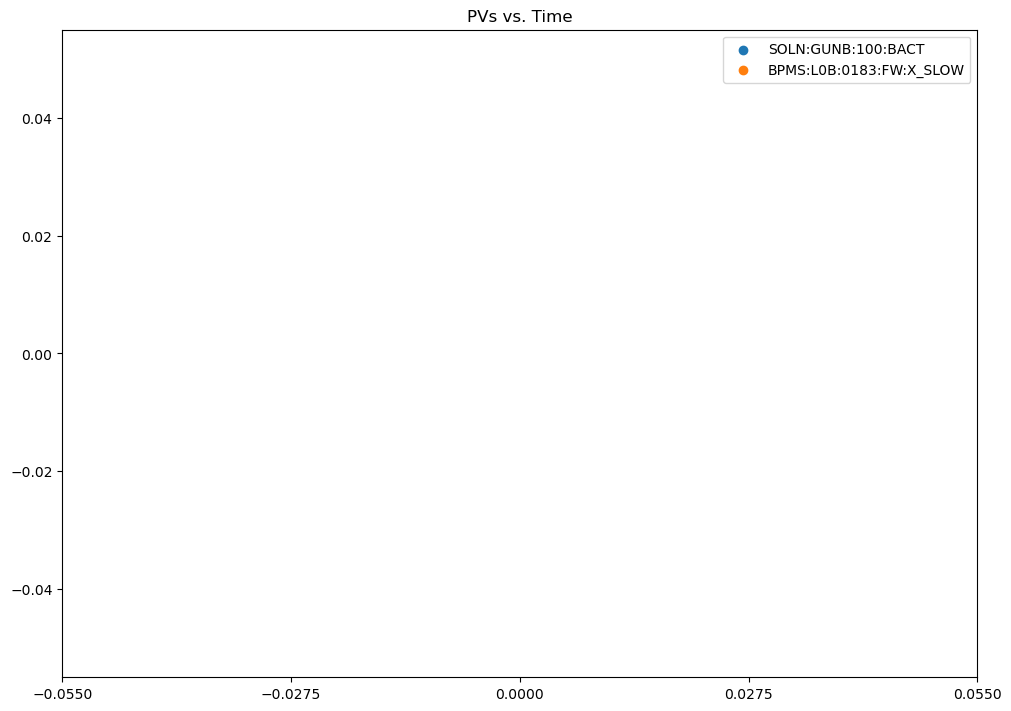

In [ ]:
# create a df for each PV (to preserve data points)
import pandas as pd 

df_soln = pd.DataFrame({"timestamps": soln_clean_timestamps, "SOLN:GUNB:100:BACT": soln_values})
df_bpm = pd.DataFrame({"timestamps": bpm_clean_timestamps, "BPMS:L0B:0183:FW:X_SLOW": bpm_values})

# graph over time

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 7), layout='constrained')
ax.scatter(df_soln["timestamps"], df_soln["SOLN:GUNB:100:BACT"], label="SOLN:GUNB:100:BACT")
ax.scatter(df_bpm["timestamps"], df_bpm["BPMS:L0B:0183:FW:X_SLOW"], label="BPMS:L0B:0183:FW:X_SLOW")
ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_title("PVs vs. Time") 
ax.legend() 

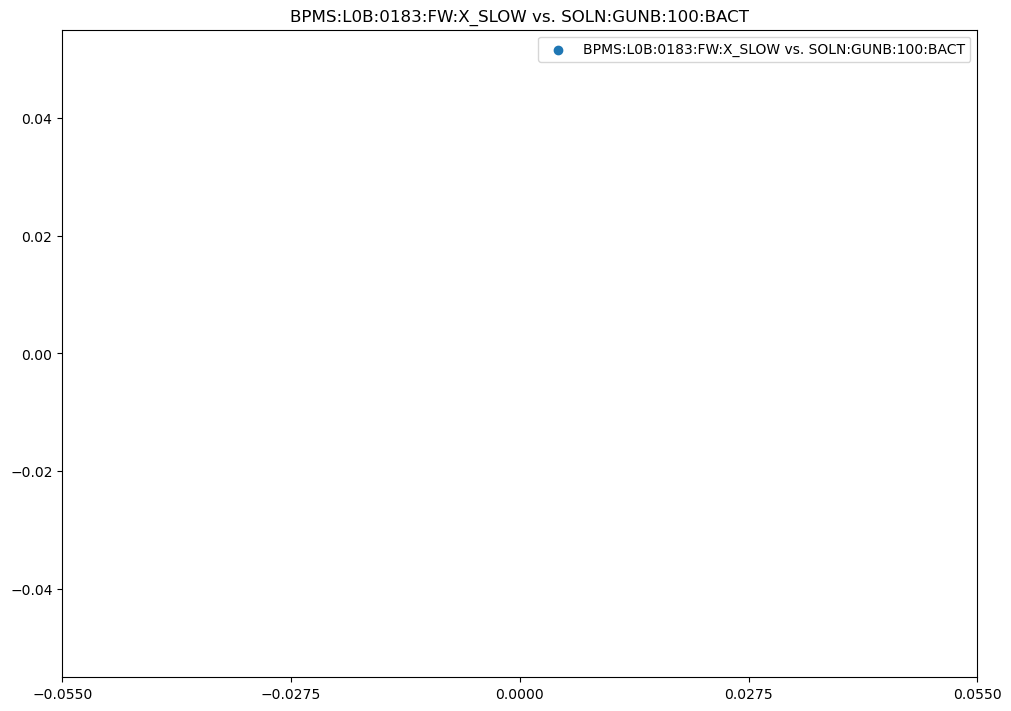

In [ ]:
# graph a basic correlation

# clean dfs so that timestamps align

df_combined = pd.merge(df_soln, df_bpm, on="timestamps")

fig, ax = plt.subplots(figsize=(10, 7), layout='constrained')
ax.scatter(df_combined["SOLN:GUNB:100:BACT"], df_combined["BPMS:L0B:0183:FW:X_SLOW"], label="BPMS:L0B:0183:FW:X_SLOW vs. SOLN:GUNB:100:BACT")
ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_title("BPMS:L0B:0183:FW:X_SLOW vs. SOLN:GUNB:100:BACT") 
ax.legend() 

After completing these exercises, I will have the tools to create correlations similar to the methods I have in archviewer plots. An extra method that will enable adding an extra column to the df will be needed. 